# Quantum Computing Exercise 1-4

When run locally, this requires installation of numpy, matplotlib, and qiskit Python modules. For example:
```
pip install numpy
pip install matplotlib
pip install qiskit
```

Required imports:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram

Use Aer's qasm_simulator:

In [26]:
simulator = QasmSimulator()

Create a Quantum Circuit. 
This needs to be extended to `(4,4)` for exercise 4.

In [27]:
circuit = QuantumCircuit(2,2)

Put some gates into the next code cell.
Examples are:
```
# X/NOT gate on qubit 0:
circuit.x(0)
# Hadamard gate on qubit 0:
circuit.h(0)
# Controlled NOT / CNOT gate with qubit 0 as control and qubit 1 as target:
circuit.cnot(0,1)
```

### Task 1

In [28]:
circuit.x(0)
circuit.h(0)
circuit.cnot(0, 1)
# circuit.h(0) #Hadamard gate on qbit 0
# circuit.h(1)
# circuit.x(1)
# circuit.y(0)
# circuit.cx(1, 0)

Map the quantum measurement to the classical bits. This needs also to be extended for exercise 4.

In [29]:
circuit.measure([0,1],[0,1])

Draw the circuit:

In [30]:
circuit.draw()

┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

Compile the circuit down to low-level QASM instructions supported by the backend (not needed for simple circuits):

In [31]:
compiled_circuit = transpile(circuit, simulator)

Execute the circuit on the qasm simulator:

In [32]:
job = simulator.run(compiled_circuit)

Grab results from the job:

In [33]:
result = job.result()
counts=result.get_counts(compiled_circuit)

Plot a histogram:

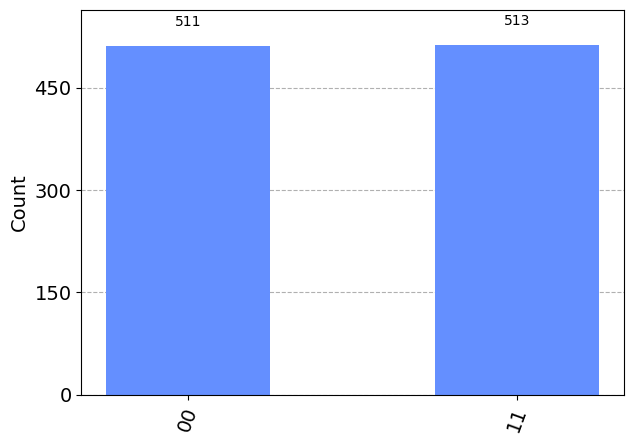

In [34]:
plot_histogram(counts)

### Task 2

In [46]:
circuit = QuantumCircuit(2,2)

circuit.h(0)
circuit.x(1)
circuit.cnot(0, 1)

circuit.measure([0,1],[0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

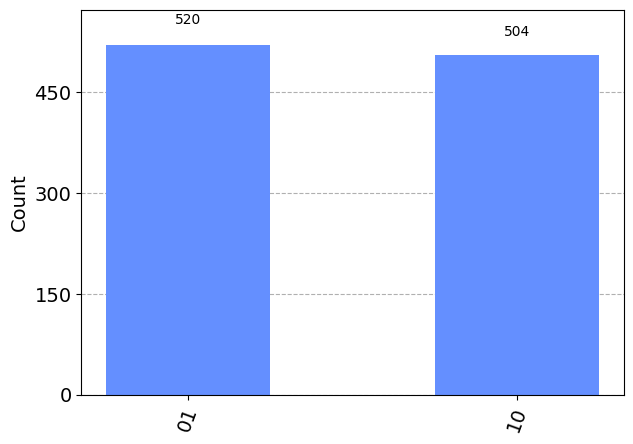

In [47]:
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)

result = job.result()
plot_histogram(result.get_counts(compiled_circuit))

### Task 3

In [65]:
circuit = QuantumCircuit(4,4)

circuit.h(0)
# circuit.x(1)
circuit.cnot(0, 1)
circuit.cnot(0, 2)
circuit.cnot(2, 3)


# circuit.measure(0,0)
# circuit.measure(1,0)
# circuit.measure(2,0)
# circuit.measure(3,0)

circuit.measure([0,1,2,3], [0,1,2,3])

circuit.draw()

┌───┐                  ┌─┐      
q_0: ┤ H ├──■────■──────────┤M├──────
     └───┘┌─┴─┐  │  ┌─┐     └╥┘      
q_1: ─────┤ X ├──┼──┤M├──────╫───────
          └───┘┌─┴─┐└╥┘      ║ ┌─┐   
q_2: ──────────┤ X ├─╫───■───╫─┤M├───
               └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_3: ────────────────╫─┤ X ├─╫──╫─┤M├
                     ║ └───┘ ║  ║ └╥┘
c: 4/════════════════╩═══════╩══╩══╩═
                     1       0  2  3

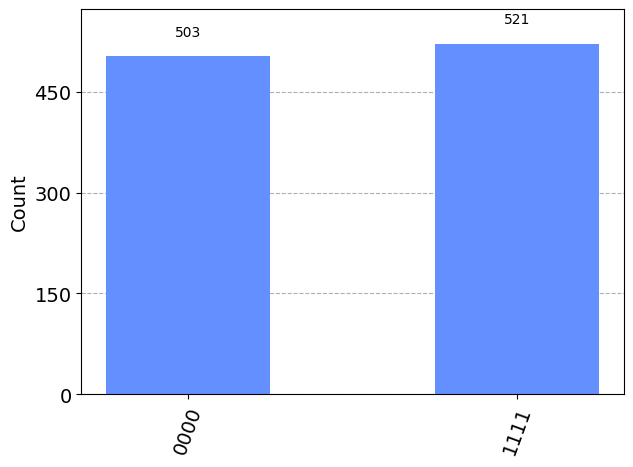

In [66]:
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)

result = job.result()
plot_histogram(result.get_counts(compiled_circuit))